## Exploratory Data Analysis Gemstone Data

**Problem Statement**

We are provided with the dataset containing the prices and other attributes of almost 193573 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share.

**Data Description**

1. Carat - Carat weight of the cubic zirconia.
2. Cut -Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. Color - Colour of the cubic zirconia.With D being the best and J the worst.
4. Clarity - cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. Depth - The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. x - Length of the cubic zirconia in mm.
8. y - Width of the cubic zirconia in mm.
9. z - Height of the cubic zirconia in mm.
10. Price -  The Price of the cubic zirconia.

In [1]:
# Importing the requierd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [2]:
# Reading the csv file
df = pd.read_csv(r'Data/train.csv')

In [3]:
# shape of the data 
df.shape

(193573, 11)

In [4]:
df = df.sample(frac=0.5)

In [5]:
df.shape

(96786, 11)

In [6]:
# top 5 rows of the data
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
45502,45502,0.30,Ideal,G,VVS1,62.4,57.0,4.31,4.34,2.70,789
165892,165892,0.91,Fair,G,SI1,65.0,60.0,6.05,6.02,3.93,3756
96935,96935,0.52,Ideal,D,VS1,60.4,57.0,5.24,5.27,3.17,2426
137108,137108,0.33,Premium,F,VS2,62.6,59.0,4.45,4.41,2.77,854
39227,39227,1.04,Ideal,D,SI2,61.2,57.0,6.53,6.50,3.99,4606


In [7]:
# last 5 rows of the data
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
68718,68718,2.29,Premium,J,SI1,61.5,59.0,8.44,8.36,5.15,14017
189338,189338,0.41,Ideal,E,VS1,61.8,56.0,4.79,4.76,2.95,984
34782,34782,0.41,Ideal,E,VS1,62.7,57.0,4.78,4.77,2.99,1073
115461,115461,0.32,Ideal,G,VS1,62.4,56.0,4.41,4.39,2.75,828
100472,100472,1.03,Premium,H,VS2,61.7,58.0,6.46,6.50,4.00,5453


In [8]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96786 entries, 45502 to 100472
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       96786 non-null  int64  
 1   carat    96786 non-null  float64
 2   cut      96786 non-null  object 
 3   color    96786 non-null  object 
 4   clarity  96786 non-null  object 
 5   depth    96786 non-null  float64
 6   table    96786 non-null  float64
 7   x        96786 non-null  float64
 8   y        96786 non-null  float64
 9   z        96786 non-null  float64
 10  price    96786 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 8.9+ MB


In [9]:
# Descriptive statistics of the data
df.describe()

,id,carat,depth,table,x,y,z,price
count,96786.000000,96786.00000,96786.000000,96786.000000,96786.000000,96786.000000,96786.000000,96786.000000
mean,96981.478613,0.79203,61.825534,57.218457,5.718667,5.723351,3.536693,3978.441582
std,55787.751888,0.46311,1.081953,1.911310,1.109730,1.102706,0.692000,4040.223334
min,1.000000,0.20000,52.200000,51.000000,0.000000,0.000000,0.000000,326.000000
25%,48801.250000,0.40000,61.300000,56.000000,4.700000,4.710000,2.910000,953.000000
50%,97230.500000,0.70000,61.900000,57.000000,5.710000,5.720000,3.530000,2422.000000
75%,145135.750000,1.03000,62.400000,58.000000,6.520000,6.510000,4.030000,5408.000000
max,193567.000000,3.50000,71.600000,70.000000,9.650000,10.010000,31.300000,18818.000000


In [10]:
# Missing values
[feature for feature in df.columns if df[feature].isnull().sum()]

[]

- There are no missing values

In [11]:
# Id column does not provide any releavent information so we have decided to drop the column
df.drop("id",axis=1,inplace=True)

### Numerical Features

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O" ]

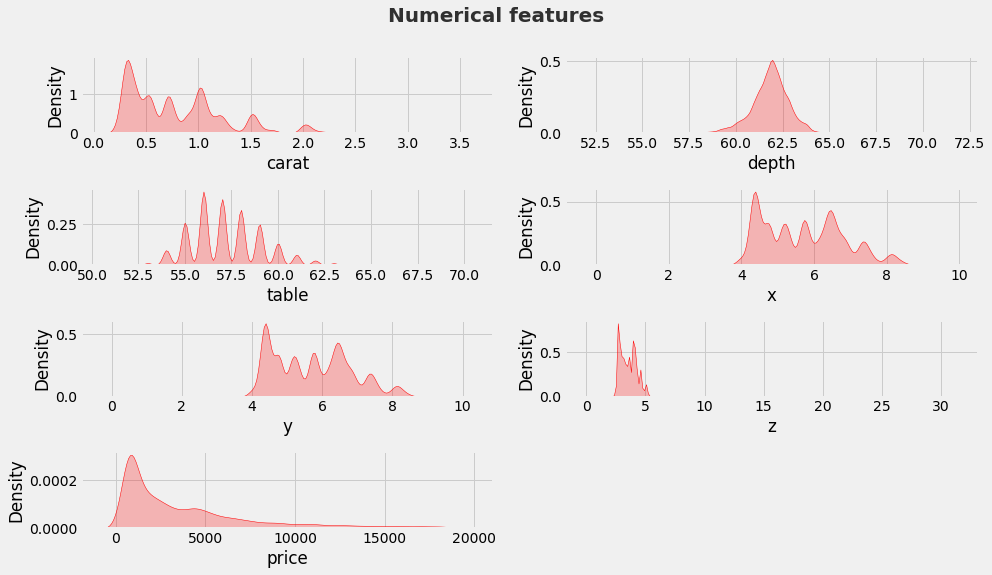

In [13]:
plt.figure(figsize=(14,8))
plt.suptitle('Numerical features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)

for i in range(0, len(numerical_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='red')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

### Categorical Features

In [14]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

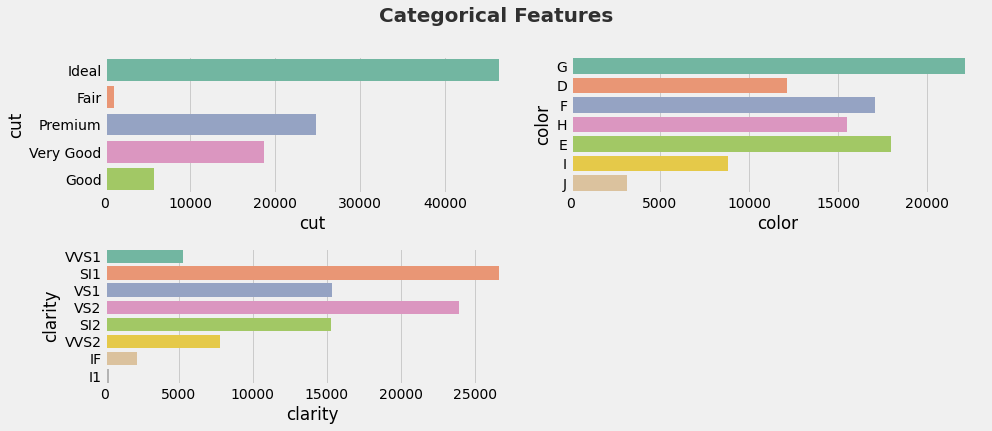

In [15]:
plt.figure(figsize=(14,6))
plt.suptitle('Categorical Features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)

for i in range(0, len(categorical_feature)):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[categorical_feature[i]],palette="Set2")
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

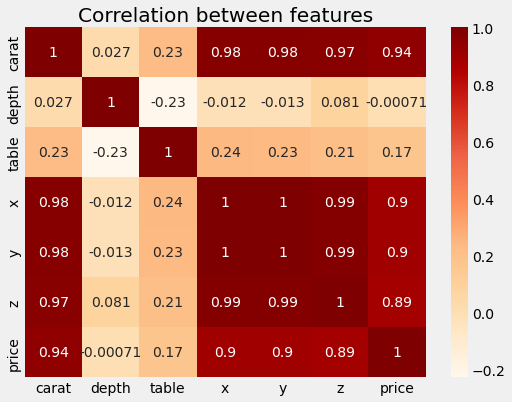

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="OrRd", annot=True)
plt.title("Correlation between features")
plt.show()

### Carat

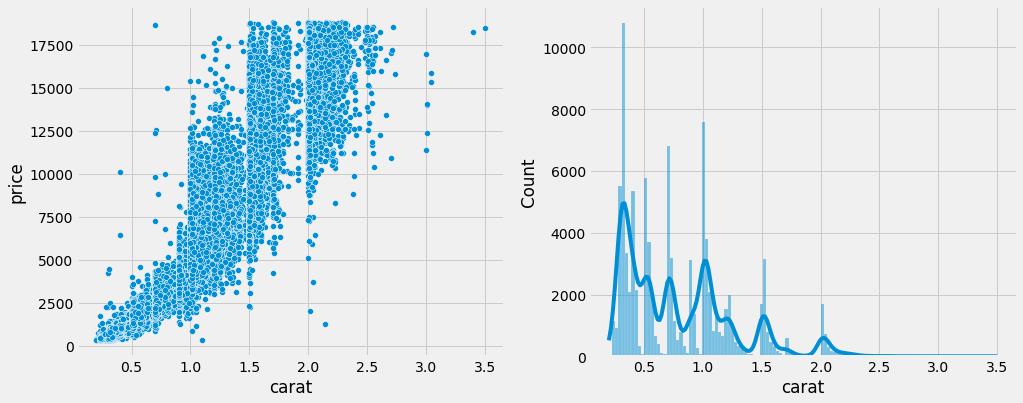

In [17]:
# carat and price column analysis
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(data=df,x='carat',y='price',ax=ax1)
sns.histplot(data=df,x='carat',kde=True,ax=ax2)
fig.set_size_inches(15,6)

plt.show()

- We can clearly see a positive correlation between carat and price.
- Our histplot shows that the majority of the data is located between 0.3 and 1.3 carats.
- There are outliers, but they are important to the price since it rises as the carat size increases. Because bigger diamonds are uncommon, modeling can benefit significantly from these outliers.

### Cut

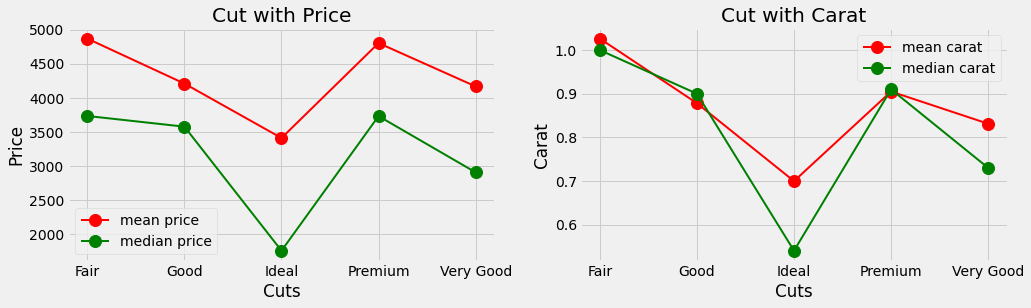

In [18]:
df1 = df.groupby(['cut']).mean().reset_index()
df2 = df.groupby(['cut']).median().reset_index()
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(df1['cut'],df1['price'] , 'go-', linewidth=2, markersize=12,c='red',label='mean price')
plt.plot(df2['cut'],df2['price'],'go-', linewidth=2, markersize=12,label="median price")
plt.title("Cut with Price")
plt.xlabel("Cuts")
plt.ylabel("Price")
plt.legend()

plt.subplot(1,2,2)
plt.plot(df1['cut'],df1['carat'] , 'go-', linewidth=2, markersize=12,c='red',label='mean carat')
plt.plot(df2['cut'],df2['carat'],'go-', linewidth=2, markersize=12,label="median carat")
plt.title("Cut with Carat")
plt.xlabel("Cuts")
plt.ylabel("Carat")
plt.legend()
plt.show()

- This plot show the difference between cut such as Fair,Good,Very Good, Ideal and Premium.
- All Good, Very Good and Ideal cut diamonds weigh less than 1 carat with medain < 1.
- There are few fair and premium cut diamonds where the weight is slightly higher than 1 carat but the median is still <=1 carat.
- Premium cut diamonds has the highest range between mean and median. 

### Color 

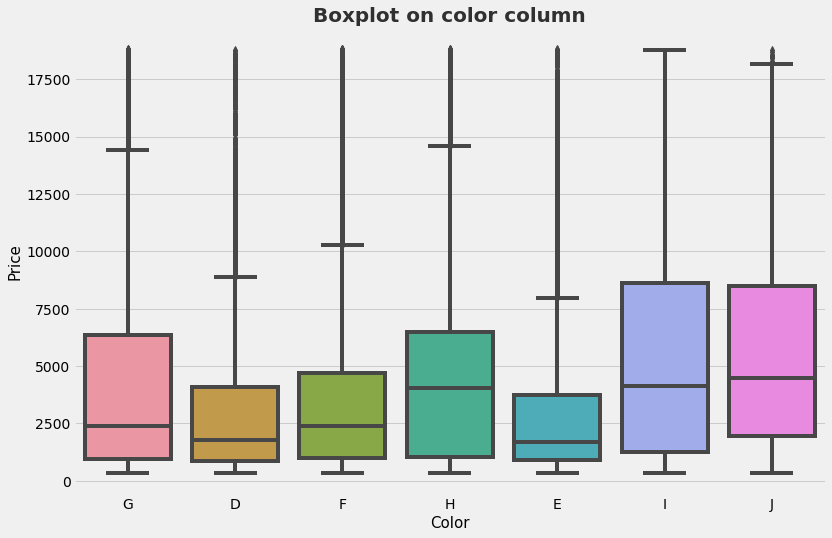

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['color'],y=df['price'])
plt.title("Boxplot on color column",fontsize=20, fontweight = 'bold', alpha=0.8,y=1)
plt.xlabel("Color",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

The Gemological Institute of America (GIA) grades diamonds from D (colorless) to Z (faint yellow tinge). Diamonds with colors ranging from D to H can be difficult to identify for non-professionals.\
**Key Points**
- D and E color grade diamonds are colorless and almost colorless, respectively. F-grade diamonds are also almost colorless, but they can only be identified by professional gemologists.
- We can see that these three color grades of diamonds have too many outliers compared to other grades. In fact, we can say that for smaller carat sizes, colorless diamonds have higher prices than diamonds of other color grades.
- G and H grade diamonds are nearly colorless or next to colorless diamonds. As shown in the plot, these grades also have some outliers, but not as many as D, E, and F grades. Color is a major factor that defines the price of a diamond.
- I and J grade diamonds have a very slight tint of color. J grade diamonds are always (10 to 20%) cheaper than I color grade diamonds. We can see that these grade diamonds do not have as many outliers, which means that their price is justified. As the carat size increases, the price also increases

### Clarity

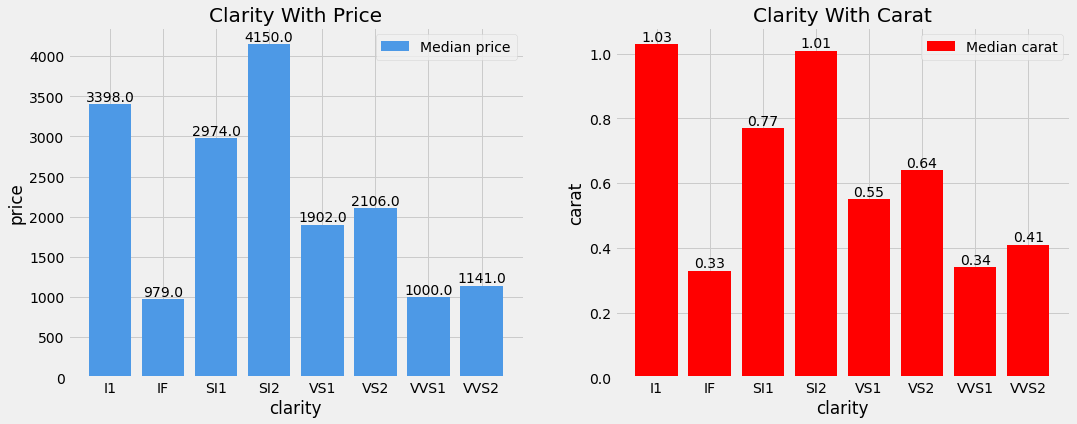

In [20]:
df1 = df.groupby(['clarity']).median().reset_index()
clarity = df1['clarity']
price = df1['price']
carat = df1['carat']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

bars1 = ax1.bar(clarity,price,label="Median price",color=(0.3, 0.6, 0.9))
ax1.set_title('Clarity With Price')
ax1.set_xlabel("clarity")
ax1.set_ylabel("price")
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')
ax1.legend()
    
bars2 = ax2.bar(clarity,carat,label="Median carat",color='red')
ax2.set_title('Clarity With Carat')
ax2.set_xlabel("clarity")
ax2.set_ylabel("carat")
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')

ax2.legend()
plt.show()

- According to gia approval, there are 6 main categories of clarity ratings, and this figure illustrates how they differ.
- IF, VVS1, VVS2, VS1, VS2, SI1, SI2, and I1 are the major and minor categories in our situation, and they are all ranked in the same order in terms of pricing as well.
- We can see that I1, which is ranked low in clearity factor, has a median price of 3355 and a carat size of 1.02, which is significantly more expensive than our first rank clearity bar, while IF, which is ranked one in clearity factor, has a median price of 979 and a carat size of 0.33.
- The median price of the S12 clearity bar is 4142, and the carat size in this clearity bar is 1.01; however, there is another important point that must be noted: the size of the carat is also larger.
- Therefore, we may conclude that the prize and the carrat are directly related, but the price will also rise as clarity improves

### Depth & Table

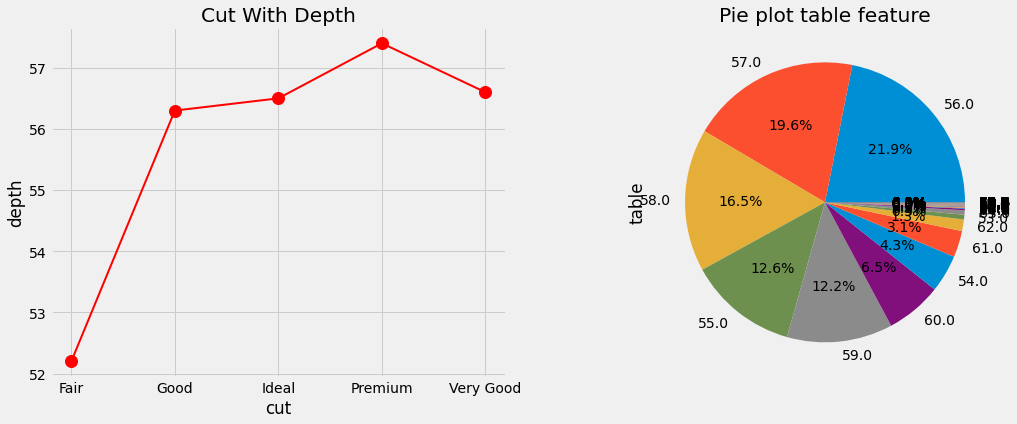

In [21]:
df1 = df.groupby(['cut']).min().reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.plot(df1['cut'],df1['depth'],'go-', linewidth=2, markersize=12,c='red')
ax1.set_title('Cut With Depth')
ax1.set_xlabel("cut")
ax1.set_ylabel("depth")
df['table'].value_counts().plot.pie(y=df['table'].value_counts().to_list()[:5],startangle=0,
                                    autopct='%1.1f%%',textprops={'fontsize': 14})
ax2.set_title('Pie plot table feature')
plt.show()

- The depth of a diamond refers to its measurement from top to bottom.
- We can observe from this plot that the cut depth increases depending on whether they choose an fair, ideal, premium, good or  very good cut.
- The majority of the carats in the pie chart only have table sizes of 56, 57, 58, 55, 59, and 60.